In [23]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

In [24]:
# Load your resampled dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [25]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [28]:
# Apply SMOTE to your dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [29]:
# Initialize a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)  # Adjust k as needed
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

In [31]:
# Train a Random Forest classifier on selected features
clf.fit(X_train_selected, y_train_resampled)

RandomForestClassifier(random_state=42)

In [32]:
# Make predictions on the training set
y_train_pred = clf.predict(X_train_selected)

In [33]:
# Calculate Sensitivity (Recall) on the training set
sensitivity_train = recall_score(y_train_resampled, y_train_pred, average='weighted')

In [34]:
# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_train_resampled, y_train_pred).ravel()
specificity = tn / (tn + fp)
print(specificity)

0.9871547848426461


In [35]:
# Calculate ROC AUC on the training set
roc_auc_train = roc_auc_score(label_binarize(y_train_resampled, classes=[10, 20]), label_binarize(y_train_pred, classes=[10, 20]), average='weighted')

In [36]:
# Calculate Accuracy on the training set
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)

In [37]:
# Calculate Precision on the training set
precision_train = precision_score(y_train_resampled, y_train_pred, average='weighted')

In [38]:
# Calculate F1 Score on the training set
f1_train = f1_score(y_train_resampled, y_train_pred, average='weighted')

In [39]:
# Calculate Kappa Statistics on the training set
kappa_train = cohen_kappa_score(y_train_resampled, y_train_pred)

In [40]:
# Generate Confusion Matrix on the training set
confusion_mat_train = confusion_matrix(y_train_resampled, y_train_pred)

Confusion Matrix (Actual vs. Predicted):
                  Predicted Positive  Predicted Negative
Actual Positive                3074                  40
Actual Negative                  17                3097


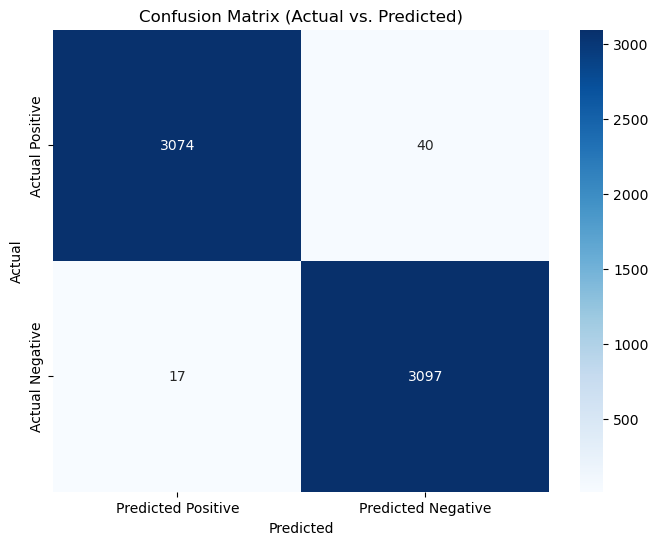

In [44]:
import seaborn as sns
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)

# Create a labeled confusion matrix
confusion_matrix_train = pd.DataFrame(conf_matrix, columns=[ "Predicted Positive","Predicted Negative"], index=["Actual Positive","Actual Negative"])

# Display the labeled confusion matrix
print("Confusion Matrix (Actual vs. Predicted):\n", confusion_matrix_train)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Actual vs. Predicted)")

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Select K Best/confusion matrix train data.svg", format='svg')


plt.show()


In [41]:
# Generate Classification Report on the training set
classification_rep_train = classification_report(y_train_resampled, y_train_pred)

In [42]:
# Print the metrics on the training set
print("Metrics on Training Set:")
print(f"Sensitivity (Recall): {sensitivity_train}")
print(f"ROC AUC: {roc_auc_train}")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"F1 Score: {f1_train}")
print(f"Kappa Statistics: {kappa_train}")
print("Confusion Matrix (Training Set):\n", confusion_mat_train)
print("Classification Report (Training Set):\n", classification_rep_train)

Metrics on Training Set:
Sensitivity (Recall): 0.9908477842003853
ROC AUC: 0.9908477842003853
Accuracy: 0.9908477842003853
Precision: 0.9908745628691357
F1 Score: 0.9908476593785284
Kappa Statistics: 0.9816955684007707
Confusion Matrix (Training Set):
 [[3074   40]
 [  17 3097]]
Classification Report (Training Set):
               precision    recall  f1-score   support

          10       0.99      0.99      0.99      3114
          20       0.99      0.99      0.99      3114

    accuracy                           0.99      6228
   macro avg       0.99      0.99      0.99      6228
weighted avg       0.99      0.99      0.99      6228



In [43]:
# Generate ROC Curve for multiclass on the training set
y_train_bin = label_binarize(y_train_resampled, classes=[10, 20])
y_train_pred_bin = label_binarize(y_train_pred, classes=[10, 20])
n_classes_train = y_train_bin.shape[1]

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes_train):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_train_pred_bin[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])


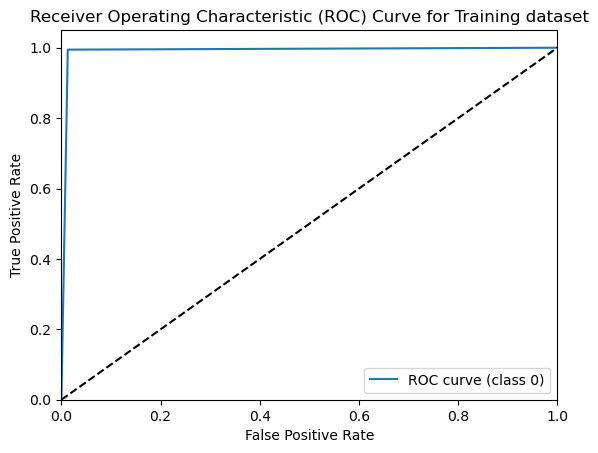

In [25]:
# Plot ROC Curve
plt.figure()
for i in range(n_classes_train):
    plt.plot(fpr_train[i], tpr_train[i], label='ROC curve (class {})'.format(i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training dataset')
plt.legend(loc="lower right")
plt.show()

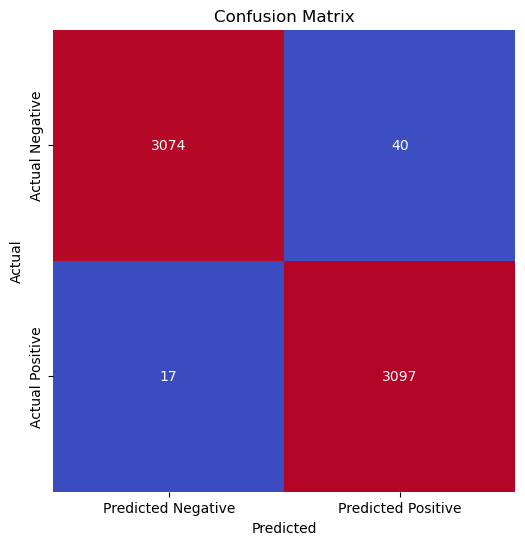

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
confusion_mat = confusion_matrix(y_train_resampled, y_train_pred)

# Define custom colors for your heatmap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a heatmap with custom colors
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap=cmap, cbar=False, square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()


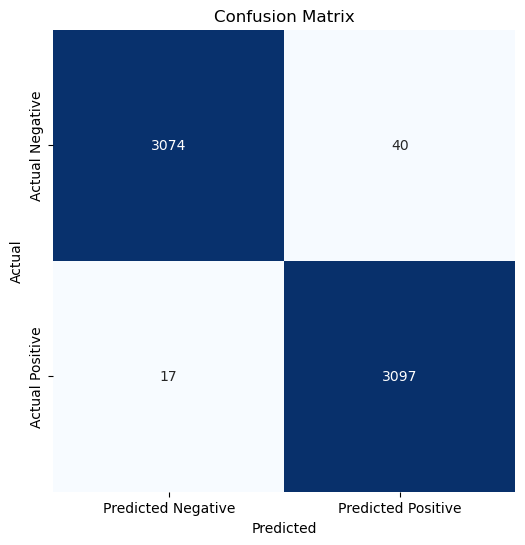

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
confusion_mat = confusion_matrix(y_train_resampled, y_train_pred)

# Create a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()